# Data Science -- pandas

Please review the attached data file (quote_data_assessment.csv), and provide the code giving the answers to the questions below in a Jupyter Notebook.

The bid is the price that a customer can sell at, and the ask is the price that they can buy at.  The spread is the difference between the two (so ask-bid).

The size columns provide the maximum amount that the provider is willing to trade on each quote.

1. What is the average spread per provider?
2. Which provider gives the tightest spread in a single quote, and what is that spread?
3. Which provider has the most variable spread?
4. Which provider quotes the largest amount on average?
5. Which provider sent the highest number of quotes in a single second?
6. Provide a plot that summarize some of the main information in this dataset

In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

def sort2(sub_list,pos): 
    sub_list.sort(key = lambda x: x[pos], reverse = True)
    return sub_list

df = pd.read_csv (r'quote_data_assessment.csv')

datalen = len(df) # over 25000+

In [2]:
data = {}
grabid = []
graask = []
graspread = []

for i in range(datalen):
    sorig = df.loc[i]['orig']
    if  sorig not in data:
        data[sorig] = {}
        data[sorig][i] = {}
    else:
        data[sorig][i] = {}

    dts = df.loc[i]['date'] + ' ' + df.loc[i]['time'][:8]
    data[sorig][i]['timestamp'] = dts
    
    data[sorig][i]['bid'] = df.loc[i]['bid']
    data[sorig][i]['ask'] = df.loc[i]['ask']
    spread = float(str(round(df.loc[i]['ask'] - df.loc[i]['bid'], 5)))
    data[sorig][i]['spread'] = spread
    data[sorig][i]['avramount'] = (df.loc[i]['bid_size'] + df.loc[i]['bid_size']) / 2
    
    grabid.append(data[sorig][i]['bid'])
    graask.append(data[sorig][i]['ask'])
    graspread.append(data[sorig][i]['spread'])

tightest = ['', 999.9]
most_varspr = ['', 0.]
highest = []
tamount = []

for i in data:
    temp = [i]
    tam = [i]
    times = [i]
    sp = []
    ts = []
    avam = []
    for n in data[i]:
        sp.append(data[i][n]['spread'])
        ts.append(data[i][n]['timestamp'])
        avam.append(data[i][n]['avramount'])
        
    temp.append(sp)
    times.append(ts)
    av = round(sum(temp[1])/len(temp[1]),5)
    pmin = min(temp[1])
    pmax = max(temp[1])

    avm = round(sum(avam)/len(avam),0)
    tam.append(avm)
    tamount.append(tam)

    if tightest[0] == '':
        tightest[0] = temp[0]
        tightest[1] = pmin
    elif tightest[1] > pmin:
        tightest[0] = temp[0]
        tightest[1] = pmin
        
    if most_varspr[0] == '':
        most_varspr[0] = temp[0]
        most_varspr[1] = pmax
    elif most_varspr[1] < pmax:
        most_varspr[0] = temp[0]
        most_varspr[1] = pmax

    #1. What is the average spread per provider?'
    print(f'{temp[0]} with average spread = {av:.5f} or {av*10000:.1f} pips')

    cnt = {}
    for c in times[1]:
        if c not in cnt:
            cnt[c] = 0
        cnt[c] += 1
    
    times_freq = []
    for key, value in cnt.items():
        times_freq.append([value, key])
    times_freq.sort(reverse=True)

    times, _ = zip(*times_freq)
    total_req = sum(times)
    highest.append([temp[0],times[0],total_req,times_freq[:3]])

print('\nDone ... first part\n')
    
print(grabid[:5])
print(graask[:5])
print(graspread[:5])


Provider1 with average spread = 0.00023 or 2.3 pips
Provider3 with average spread = 0.00026 or 2.6 pips
Provider2 with average spread = 0.00027 or 2.7 pips
Provider4 with average spread = 0.00025 or 2.5 pips

Done ... first part

[1.1834799999999999, 1.18347, 1.18347, 1.18345, 1.18346]
[1.18371, 1.18372, 1.1837, 1.18373, 1.18372]
[0.00023, 0.00025, 0.00023, 0.00028, 0.00026]


In [3]:
# ----------------------

# 2. Which provider gives the tightest spread in a single quote, and what is that spread?
print(f'\n2. The tightest spread is on {tightest[0]}, equal to {tightest[1]:.5f} or {tightest[1]*10000:.1f} pips')

# 3. Which provider has the most variable spread?
print(f'\n3. The most variable spread is on {most_varspr[0]}, equal to {most_varspr[1]:.5f} or {most_varspr[1]*10000:.1f} pips')

# 4. Which provider quotes the largest amount on average?
print('\n4. Which provider quotes the largest amount on average?')
tamount_sorted = sort2(tamount,1)
#print('amount == ',tamount_sorted)
#print()
avm = 0.
for i in range(len(tamount_sorted)):
    if tamount_sorted[i][1] >= avm:
        print(f'{tamount_sorted[i][0]} with largest amout on average of {tamount_sorted[i][1]}')
    avm = tamount_sorted[i][1]

# 5. Which provider sent the highest number of quotes in a single second?
print('\n5. Which provider sent the highest number of quotes in a single second:')
highest_sorted = sort2(highest,1)

for i in range(len(highest)):
    print(f'{highest[i][0]} sent highest number of {highest[i][1]} quotes in a single second, from {highest[i][2]} total')
print()

print('The first 3 highest numbers of quotes are:')
for i in range(len(highest)):
    print(f'{highest[i][0]}: {highest[i][3]}')


print("\nDone...")


2. The tightest spread is on Provider1, equal to 0.00020 or 2.0 pips

3. The most variable spread is on Provider4, equal to 0.00072 or 7.2 pips

4. Which provider quotes the largest amount on average?
Provider1 with largest amout on average of 1000000.0
Provider4 with largest amout on average of 1000000.0

5. Which provider sent the highest number of quotes in a single second:
Provider1 sent highest number of 69 quotes in a single second, from 7950 total
Provider4 sent highest number of 29 quotes in a single second, from 5982 total
Provider3 sent highest number of 27 quotes in a single second, from 6869 total
Provider2 sent highest number of 16 quotes in a single second, from 3570 total

The first 3 highest numbers of quotes are:
Provider1: [[69, '2020-11-17 08:00:48'], [50, '2020-11-17 08:00:16'], [48, '2020-11-17 08:24:55']]
Provider4: [[29, '2020-11-17 08:02:16'], [25, '2020-11-17 08:01:48'], [25, '2020-11-17 08:01:43']]
Provider3: [[27, '2020-11-17 08:20:39'], [27, '2020-11-17 08:

### 6. Please provide 2 - 3 plots that summarize some of the main information in this dataset

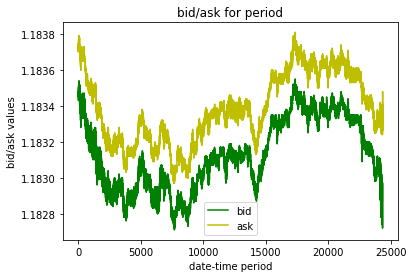

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.plot( grabid,'g', label="bid")
ax.plot( graask, 'y', label="ask")

plt.legend()
plt.title('bid/ask for period')
plt.ylabel('bid/ask values')
plt.xlabel('date-time period')

plt.show()

In [6]:
yy = []
for i in range(len(highest)):
    y = []
    y.append(highest[i][0])
    y.append(highest[i][1])
    y.append(highest[i][2])
    yy.append(y)
    yy.sort()

barqt = [yy[0][1], yy[1][1], yy[2][1], yy[3][1]]
bartotal = [yy[0][2], yy[1][2], yy[2][2], yy[3][2]]

<function matplotlib.pyplot.show(*args, **kw)>

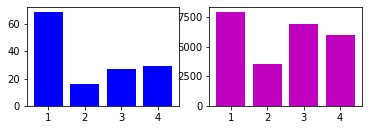

In [7]:
from matplotlib import pyplot as plt

x = [1,2,3,4]  # Providers

plt.subplot(221)
plt.bar(x, barqt, label='qtpsec', color='b')

plt.subplot(222)
plt.bar(x, bartotal, label='total', color='m')

plt.show